In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
#  LOAD DATASETS 

member_df = pd.read_csv('HNG13 member analytics 15 Oct 2025 – 6 Dec 2025.csv')
channel_df = pd.read_csv('HNG13 channel analytics 15 Oct 2025 – 6 Dec 2025.csv')
analytics_df = pd.read_csv('HNG13 analytics 15 Oct 2025 to 6 Dec 2025 – 8 Dec 2025.csv')

print(f"✓ Member data loaded: {member_df.shape}")
print(f"✓ Channel data loaded: {channel_df.shape}")
print(f"✓ Analytics data loaded: {analytics_df.shape}")



✓ Member data loaded: (12535, 6)
✓ Channel data loaded: (56, 8)
✓ Analytics data loaded: (53, 31)


In [3]:
# DATA QUALITY CHECKS & CLEANING 

# Check 1: Missing Values
print("\n1. MISSING VALUES ANALYSIS:")
print("\nMember Data Missing Values:")
print(member_df.isnull().sum())
print("\nChannel Data Missing Values:")
print(channel_df.isnull().sum())
print("\nAnalytics Data Missing Values:")
print(analytics_df.isnull().sum())





1. MISSING VALUES ANALYSIS:

Member Data Missing Values:
Name                        0
What I do                9160
Account type                0
Account created (UTC)       0
Days active                 0
Messages posted             0
dtype: int64

Channel Data Missing Values:
Name                   0
Description           48
Visibility             0
Created                0
Total membership       0
Messages posted        0
Members who posted     0
Members who viewed     0
dtype: int64

Analytics Data Missing Values:
Date                                        0
Total enabled membership                    0
Enabled full members                        0
Enabled guests                              0
Daily active people                         0
Daily people posting messages               0
Weekly active people                        0
Weekly people posting messages              0
Messages in public channels                 0
Messages in private channels                0
Messages in sh

In [4]:
# Check 2: Data Types
print("\n2. DATA TYPES BEFORE CONVERSION:")
print("\nMember Data Types:")
print(member_df.dtypes)
print("\nChannel Data Types:")
print(channel_df.dtypes)
print("\nAnalytics Data Types:")
print(analytics_df.dtypes)



2. DATA TYPES BEFORE CONVERSION:

Member Data Types:
Name                     object
What I do                object
Account type             object
Account created (UTC)    object
Days active               int64
Messages posted           int64
dtype: object

Channel Data Types:
Name                  object
Description           object
Visibility            object
Created               object
Total membership       int64
Messages posted        int64
Members who posted     int64
Members who viewed     int64
dtype: object

Analytics Data Types:
Date                                         object
Total enabled membership                      int64
Enabled full members                          int64
Enabled guests                                int64
Daily active people                           int64
Daily people posting messages                 int64
Weekly active people                          int64
Weekly people posting messages                int64
Messages in public channels       

In [5]:

# Check 3: Convert Date Columns
print("\n3. CONVERTING DATE COLUMNS:")

# Member data - Account created date
member_df['Account created (UTC)'] = pd.to_datetime(member_df['Account created (UTC)'], 
                                                     format='%d %b %Y', errors='coerce')
print(f"✓ Member 'Account created (UTC)' converted to datetime")

# Channel data - Created date
channel_df['Created'] = pd.to_datetime(channel_df['Created'], 
                                       format='%d %b %Y', errors='coerce')
print(f"✓ Channel 'Created' converted to datetime")

# Analytics data - Date column
analytics_df['Date'] = pd.to_datetime(analytics_df['Date'], 
                                      format='%Y-%m-%d', errors='coerce')
print(f"✓ Analytics 'Date' converted to datetime")

# Check 4: Data Type Verification
print("\n4. DATA TYPES AFTER CONVERSION:")
print(f"Member 'Account created (UTC)': {member_df['Account created (UTC)'].dtype}")
print(f"Channel 'Created': {channel_df['Created'].dtype}")
print(f"Analytics 'Date': {analytics_df['Date'].dtype}")



3. CONVERTING DATE COLUMNS:
✓ Member 'Account created (UTC)' converted to datetime
✓ Channel 'Created' converted to datetime
✓ Analytics 'Date' converted to datetime

4. DATA TYPES AFTER CONVERSION:
Member 'Account created (UTC)': datetime64[ns]
Channel 'Created': datetime64[ns]
Analytics 'Date': datetime64[ns]


In [6]:
# Check 5: Numeric Columns Validation
print("\n5. NUMERIC COLUMNS VALIDATION:")
numeric_cols_member = member_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_channel = channel_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_analytics = analytics_df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Member numeric columns: {numeric_cols_member}")
print(f"Channel numeric columns: {numeric_cols_channel}")
print(f"Analytics numeric columns: {numeric_cols_analytics}")

# Check 6: Duplicate Records
print("\n6. DUPLICATE RECORDS CHECK:")
print(f"Member duplicates: {member_df.duplicated().sum()}")
print(f"Channel duplicates: {channel_df.duplicated().sum()}")
print(f"Analytics duplicates: {analytics_df.duplicated().sum()}")

# Check 7: Data Range Validation
print("\n7. DATA RANGE VALIDATION:")
print(f"\nMember 'Days active' range: {member_df['Days active'].min()} - {member_df['Days active'].max()}")
print(f"Member 'Messages posted' range: {member_df['Messages posted'].min()} - {member_df['Messages posted'].max()}")
print(f"Channel 'Total membership' range: {channel_df['Total membership'].min()} - {channel_df['Total membership'].max()}")
print(f"Analytics 'Daily active people' range: {analytics_df['Daily active people'].min()} - {analytics_df['Daily active people'].max()}")



5. NUMERIC COLUMNS VALIDATION:
Member numeric columns: ['Days active', 'Messages posted']
Channel numeric columns: ['Total membership', 'Messages posted', 'Members who posted', 'Members who viewed']
Analytics numeric columns: ['Total enabled membership', 'Enabled full members', 'Enabled guests', 'Daily active people', 'Daily people posting messages', 'Weekly active people', 'Weekly people posting messages', 'Messages in public channels', 'Messages in private channels', 'Messages in shared channels', 'Messages in DMs', 'Percentage of messages, public channels', 'Percentage of messages, private channels', 'Percentage of messages, DMs', 'Percentage of views, public channels', 'Percentage of views, private channels', 'Percentage of views, DMs', 'Total full members', 'Total guests', 'Total members', 'Total claimed full members', 'Total claimed guests', 'Total claimed members', 'Files uploaded', 'Messages posted by members', 'Public channels, single-workspace', 'Messages posted', 'Messages 

In [7]:
# KEY METRICS CALCULATION 

print("KEY METRICS CALCULATION")

# Member Metrics
print("\n1. MEMBER METRICS:")
total_members = len(member_df)
active_members = member_df[member_df['Days active'] > 0]
churned_members = member_df[member_df['Days active'] == 0]
avg_days_active = member_df['Days active'].mean()
median_days_active = member_df['Days active'].median()
avg_messages = member_df['Messages posted'].mean()
median_messages = member_df['Messages posted'].median()
total_messages_members = member_df['Messages posted'].sum()
members_with_messages = len(member_df[member_df['Messages posted'] > 0])
engagement_rate_members = (members_with_messages / total_members) * 100

print(f"Total Members: {total_members:,}")
print(f"Active Members (Days active > 0): {len(active_members):,} ({len(active_members)/total_members*100:.1f}%)")
print(f"Churned Members (Days active = 0): {len(churned_members):,} ({len(churned_members)/total_members*100:.1f}%)")
print(f"Average Days Active: {avg_days_active:.2f}")
print(f"Median Days Active: {median_days_active:.2f}")
print(f"Average Messages per Member: {avg_messages:.2f}")
print(f"Median Messages per Member: {median_messages:.2f}")
print(f"Total Messages by Members: {total_messages_members:,}")
print(f"Members with Messages: {members_with_messages:,} ({engagement_rate_members:.1f}%)")

# Account Type Distribution
print("\nAccount Type Distribution:")
account_dist = member_df['Account type'].value_counts()
for acc_type, count in account_dist.items():
    print(f"  {acc_type}: {count:,} ({count/total_members*100:.1f}%)")

# Channel Metrics
print("\n2. CHANNEL METRICS:")
total_channels = len(channel_df)
avg_membership = channel_df['Total membership'].mean()
median_membership = channel_df['Total membership'].median()
avg_messages_channel = channel_df['Messages posted'].mean()
median_messages_channel = channel_df['Messages posted'].median()
total_messages_channels = channel_df['Messages posted'].sum()
channels_with_messages = len(channel_df[channel_df['Messages posted'] > 0])

print(f"Total Channels: {total_channels:,}")
print(f"Average Membership per Channel: {avg_membership:.2f}")
print(f"Median Membership per Channel: {median_membership:.2f}")
print(f"Average Messages per Channel: {avg_messages_channel:.2f}")
print(f"Median Messages per Channel: {median_messages_channel:.2f}")
print(f"Total Messages in Channels: {total_messages_channels:,}")
print(f"Channels with Messages: {channels_with_messages:,} ({channels_with_messages/total_channels*100:.1f}%)")

# Visibility Distribution
print("\nChannel Visibility Distribution:")
visibility_dist = channel_df['Visibility'].value_counts()
for vis, count in visibility_dist.items():
    print(f"  {vis}: {count:,} ({count/total_channels*100:.1f}%)")

# Workspace Metrics
print("\n3. WORKSPACE METRICS:")
total_public_msgs = analytics_df['Messages in public channels'].sum()
total_private_msgs = analytics_df['Messages in private channels'].sum()
total_dms = analytics_df['Messages in DMs'].sum()
total_all_msgs = total_public_msgs + total_private_msgs + total_dms
avg_daily_active = analytics_df['Daily active people'].mean()
avg_monthly_active = analytics_df['Monthly active people'].mean()
total_files = analytics_df['Files uploaded'].sum()

print(f"Total Messages (Public Channels): {total_public_msgs:,} ({total_public_msgs/total_all_msgs*100:.1f}%)")
print(f"Total Messages (Private Channels): {total_private_msgs:,} ({total_private_msgs/total_all_msgs*100:.1f}%)")
print(f"Total Messages (DMs): {total_dms:,} ({total_dms/total_all_msgs*100:.1f}%)")
print(f"Total Messages (All): {total_all_msgs:,}")
print(f"Average Daily Active People: {avg_daily_active:.0f}")
print(f"Average Monthly Active People: {avg_monthly_active:.0f}")
print(f"Total Files Uploaded: {total_files:,}")




KEY METRICS CALCULATION

1. MEMBER METRICS:
Total Members: 12,535
Active Members (Days active > 0): 11,650 (92.9%)
Churned Members (Days active = 0): 885 (7.1%)
Average Days Active: 9.59
Median Days Active: 3.00
Average Messages per Member: 210.28
Median Messages per Member: 2.00
Total Messages by Members: 2,635,806
Members with Messages: 8,487 (67.7%)

Account Type Distribution:
  Member: 12,295 (98.1%)
  Admin: 156 (1.2%)
  Invited member: 67 (0.5%)
  Owner: 16 (0.1%)
  Multi-channel guest: 1 (0.0%)

2. CHANNEL METRICS:
Total Channels: 56
Average Membership per Channel: 248.57
Median Membership per Channel: 126.00
Average Messages per Channel: 1823.57
Median Messages per Channel: 537.00
Total Messages in Channels: 102,120
Channels with Messages: 56 (100.0%)

Channel Visibility Distribution:
  public: 56 (100.0%)

3. WORKSPACE METRICS:
Total Messages (Public Channels): 130,039 (4.9%)
Total Messages (Private Channels): 743,305 (28.2%)
Total Messages (DMs): 1,766,783 (66.9%)
Total Messa

EDA BLOCK 1: DAILY ACTIVITY TRENDS & WORKSPACE OVERVIEW


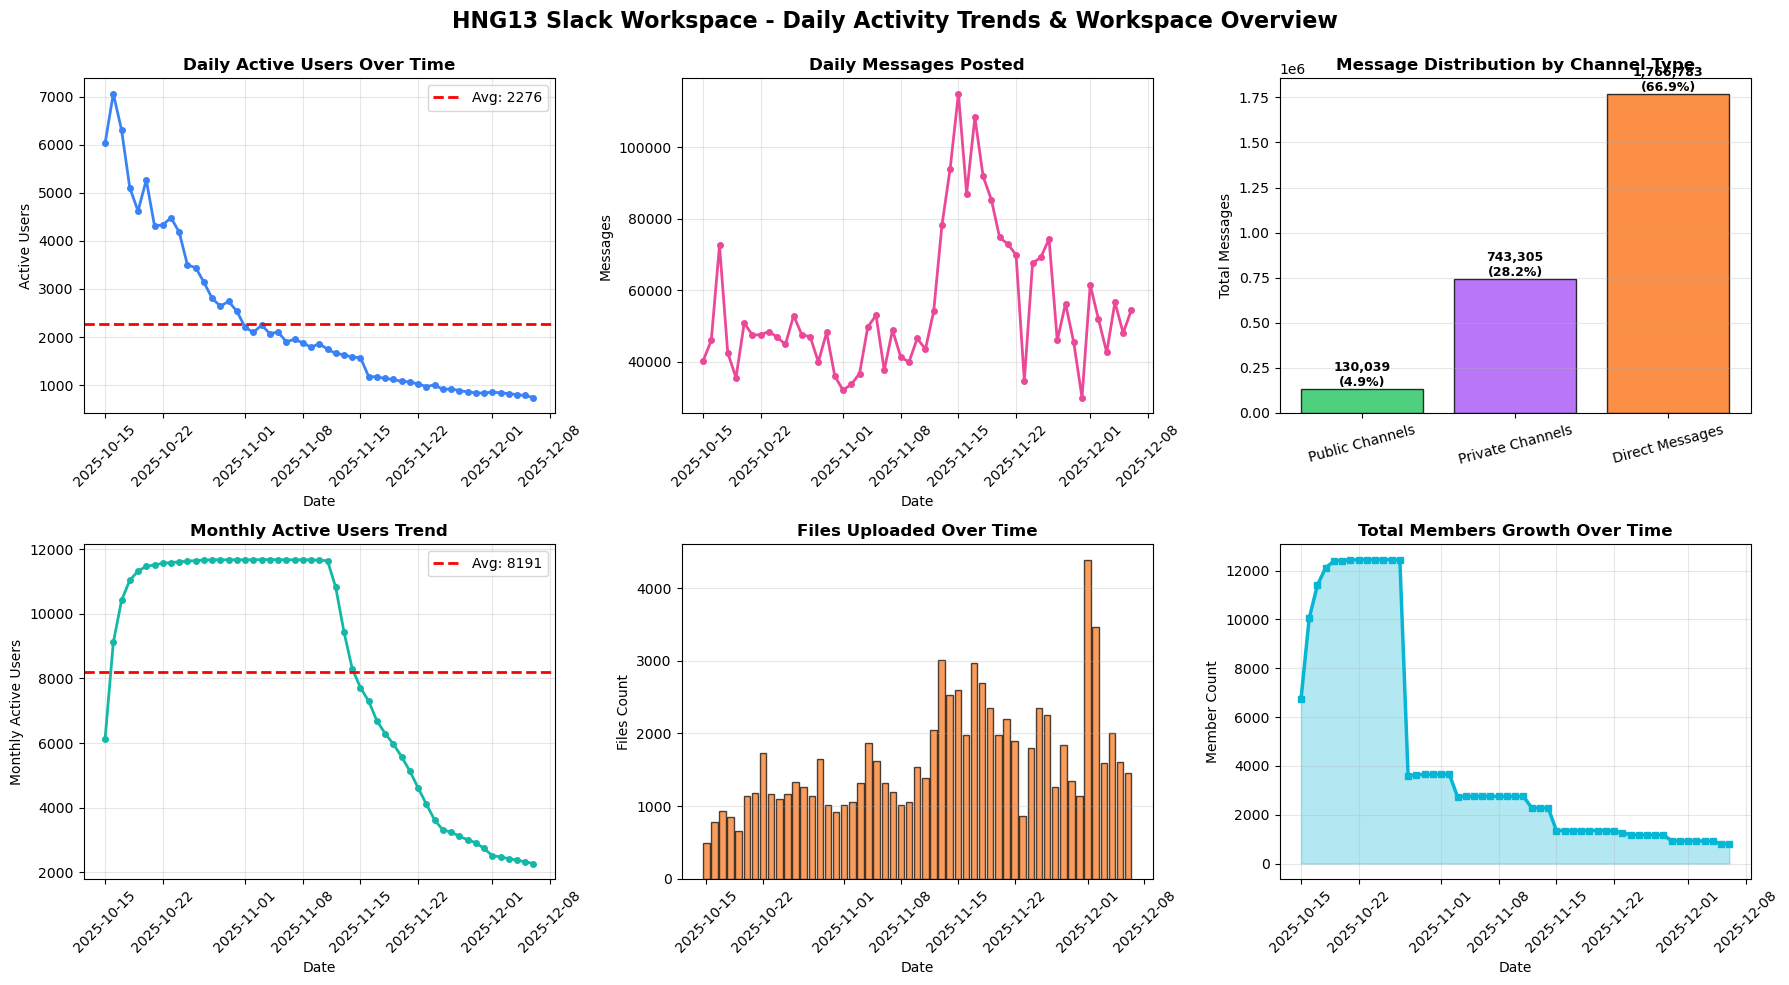

In [8]:
# EDA BLOCK 1: DAILY ACTIVITY TRENDS & WORKSPACE OVERVIEW 

print("EDA BLOCK 1: DAILY ACTIVITY TRENDS & WORKSPACE OVERVIEW")


fig1, axes1 = plt.subplots(2, 3, figsize=(18, 10))
fig1.suptitle('HNG13 Slack Workspace - Daily Activity Trends & Workspace Overview', 
              fontsize=16, fontweight='bold')

# Graph 1: Daily active people over time
axes1[0, 0].plot(analytics_df['Date'], analytics_df['Daily active people'], 
                 color='#3B82F6', linewidth=2, marker='o', markersize=4)
axes1[0, 0].set_title('Daily Active Users Over Time', fontsize=12, fontweight='bold')
axes1[0, 0].set_xlabel('Date')
axes1[0, 0].set_ylabel('Active Users')
axes1[0, 0].grid(True, alpha=0.3)
axes1[0, 0].tick_params(axis='x', rotation=45)
axes1[0, 0].axhline(avg_daily_active, color='red', linestyle='--', linewidth=2, 
                    label=f'Avg: {avg_daily_active:.0f}')
axes1[0, 0].legend()

# Graph 2: Messages posted per day
axes1[0, 1].plot(analytics_df['Date'], analytics_df['Messages posted'], 
                 color='#EC4899', linewidth=2, marker='o', markersize=4)
axes1[0, 1].set_title('Daily Messages Posted', fontsize=12, fontweight='bold')
axes1[0, 1].set_xlabel('Date')
axes1[0, 1].set_ylabel('Messages')
axes1[0, 1].grid(True, alpha=0.3)
axes1[0, 1].tick_params(axis='x', rotation=45)

# Graph 3: Message distribution by channel type
message_types = ['Public Channels', 'Private Channels', 'Direct Messages']
message_counts = [total_public_msgs, total_private_msgs, total_dms]
colors = ['#22C55E', '#A855F7', '#F97316']
bars = axes1[0, 2].bar(message_types, message_counts, color=colors, edgecolor='black', alpha=0.8)
axes1[0, 2].set_title('Message Distribution by Channel Type', fontsize=12, fontweight='bold')
axes1[0, 2].set_ylabel('Total Messages')
axes1[0, 2].tick_params(axis='x', rotation=15)
for i, v in enumerate(message_counts):
    axes1[0, 2].text(i, v, f'{v:,}\n({v/total_all_msgs*100:.1f}%)', 
                     ha='center', va='bottom', fontweight='bold', fontsize=9)
axes1[0, 2].grid(axis='y', alpha=0.3)

# Graph 4: Monthly active people trend
axes1[1, 0].plot(analytics_df['Date'], analytics_df['Monthly active people'], 
                 color='#14B8A6', linewidth=2, marker='o', markersize=4)
axes1[1, 0].set_title('Monthly Active Users Trend', fontsize=12, fontweight='bold')
axes1[1, 0].set_xlabel('Date')
axes1[1, 0].set_ylabel('Monthly Active Users')
axes1[1, 0].grid(True, alpha=0.3)
axes1[1, 0].tick_params(axis='x', rotation=45)
axes1[1, 0].axhline(avg_monthly_active, color='red', linestyle='--', linewidth=2, 
                    label=f'Avg: {avg_monthly_active:.0f}')
axes1[1, 0].legend()

# Graph 5: Files uploaded over time
axes1[1, 1].bar(analytics_df['Date'], analytics_df['Files uploaded'], 
                color='#F97316', edgecolor='black', alpha=0.7, width=0.8)
axes1[1, 1].set_title('Files Uploaded Over Time', fontsize=12, fontweight='bold')
axes1[1, 1].set_xlabel('Date')
axes1[1, 1].set_ylabel('Files Count')
axes1[1, 1].tick_params(axis='x', rotation=45)
axes1[1, 1].grid(axis='y', alpha=0.3)

# Graph 6: Total members growth over time
axes1[1, 2].plot(analytics_df['Date'], analytics_df['Total members'], 
                 color='#06B6D4', linewidth=2.5, marker='s', markersize=5)
axes1[1, 2].fill_between(analytics_df['Date'], analytics_df['Total members'], 
                         alpha=0.3, color='#06B6D4')
axes1[1, 2].set_title('Total Members Growth Over Time', fontsize=12, fontweight='bold')
axes1[1, 2].set_xlabel('Date')
axes1[1, 2].set_ylabel('Member Count')
axes1[1, 2].grid(True, alpha=0.3)
axes1[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('HNG13_EDA_Block1_Daily_Activity_Trends.png', dpi=300, bbox_inches='tight')
plt.show()




EDA BLOCK 2: MEMBER ENGAGEMENT ANALYSIS


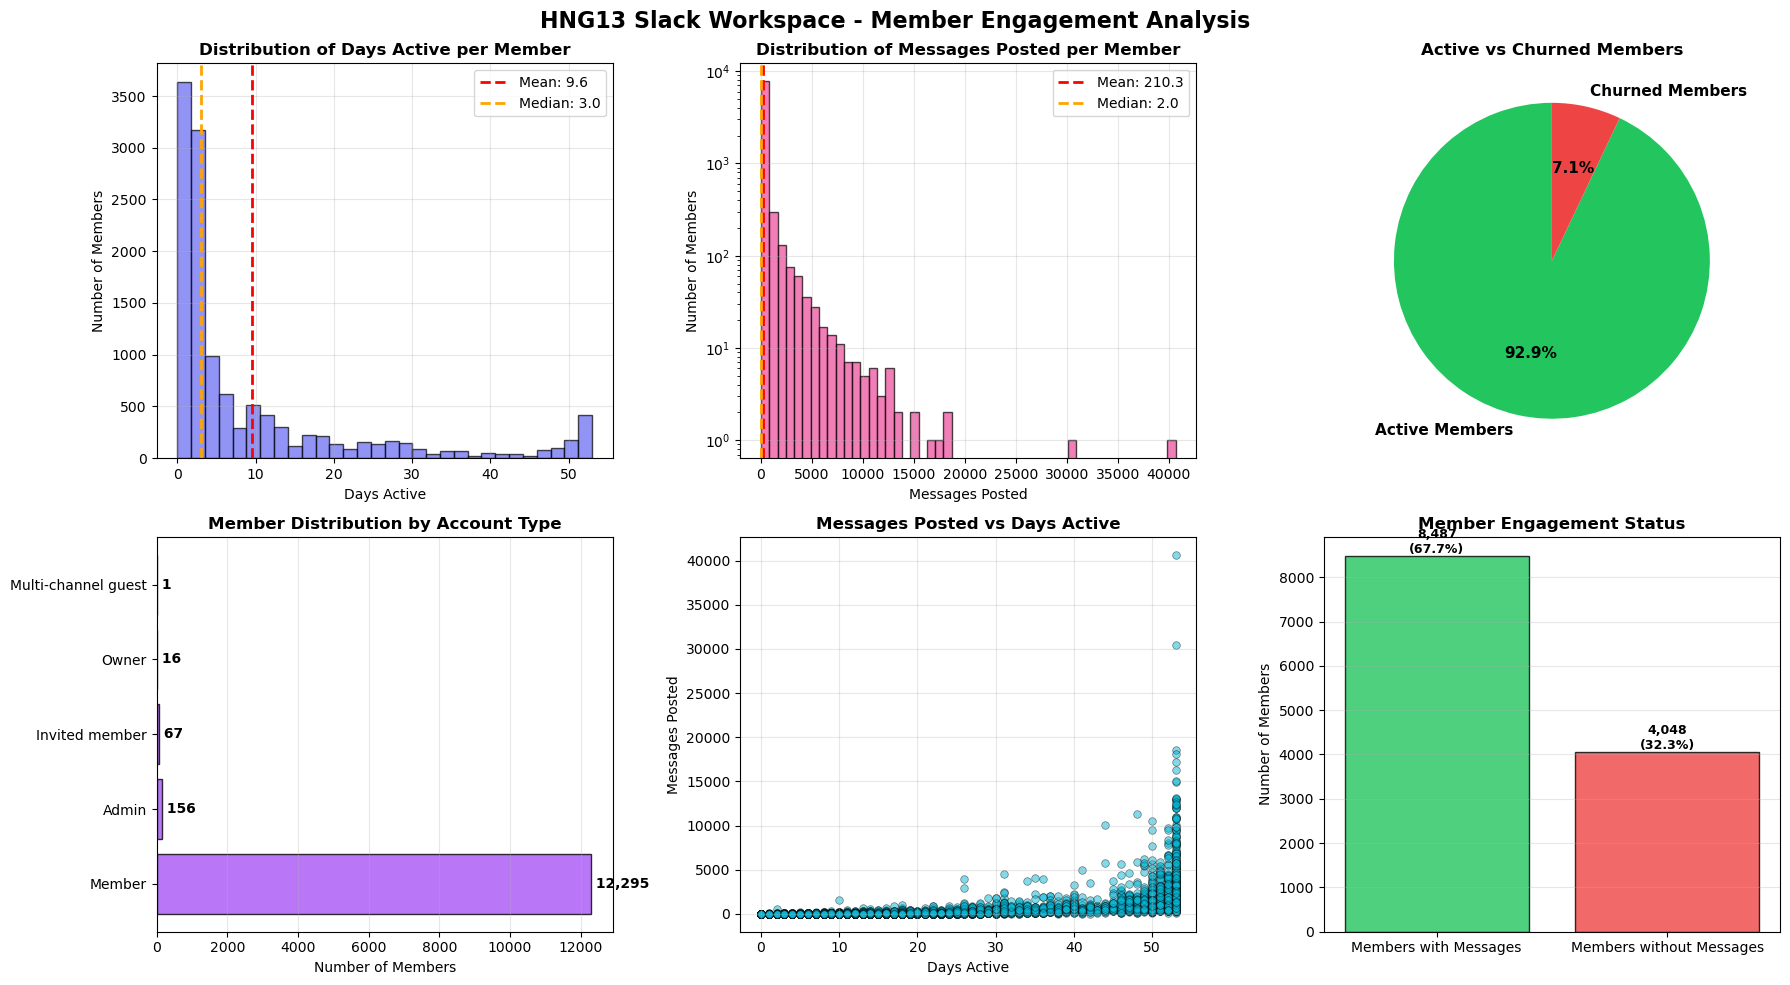

In [9]:
# EDA BLOCK 2: MEMBER ENGAGEMENT ANALYSIS (6 Graphs) 

print("EDA BLOCK 2: MEMBER ENGAGEMENT ANALYSIS")


fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('HNG13 Slack Workspace - Member Engagement Analysis', 
              fontsize=16, fontweight='bold')

# Graph 1: Distribution of days active
axes2[0, 0].hist(member_df['Days active'], bins=30, color='#6366F1', 
                 edgecolor='black', alpha=0.7)
axes2[0, 0].set_title('Distribution of Days Active per Member', fontsize=12, fontweight='bold')
axes2[0, 0].set_xlabel('Days Active')
axes2[0, 0].set_ylabel('Number of Members')
axes2[0, 0].axvline(avg_days_active, color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {avg_days_active:.1f}')
axes2[0, 0].axvline(median_days_active, color='orange', linestyle='--', linewidth=2,
                    label=f'Median: {median_days_active:.1f}')
axes2[0, 0].legend()
axes2[0, 0].grid(True, alpha=0.3)

# Graph 2: Distribution of messages posted (log scale)
messages_nonzero = member_df[member_df['Messages posted'] > 0]['Messages posted']
axes2[0, 1].hist(messages_nonzero, bins=50, color='#EC4899', edgecolor='black', alpha=0.7)
axes2[0, 1].set_title('Distribution of Messages Posted per Member', fontsize=12, fontweight='bold')
axes2[0, 1].set_xlabel('Messages Posted')
axes2[0, 1].set_ylabel('Number of Members')
axes2[0, 1].set_yscale('log')
axes2[0, 1].axvline(avg_messages, color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {avg_messages:.1f}')
axes2[0, 1].axvline(median_messages, color='orange', linestyle='--', linewidth=2,
                    label=f'Median: {median_messages:.1f}')
axes2[0, 1].legend()
axes2[0, 1].grid(True, alpha=0.3)

# Graph 3: Active vs Churned members
member_status = ['Active Members', 'Churned Members']
member_counts = [len(active_members), len(churned_members)]
colors_pie = ['#22C55E', '#EF4444']
wedges, texts, autotexts = axes2[0, 2].pie(member_counts, labels=member_status, 
                                             autopct='%1.1f%%', colors=colors_pie, 
                                             startangle=90,
                                             textprops={'fontsize': 11, 'fontweight': 'bold'})
axes2[0, 2].set_title('Active vs Churned Members', fontsize=12, fontweight='bold')

# Graph 4: Account type distribution
account_types = member_df['Account type'].value_counts()
axes2[1, 0].barh(account_types.index, account_types.values, color='#A855F7', 
                 edgecolor='black', alpha=0.8)
axes2[1, 0].set_title('Member Distribution by Account Type', fontsize=12, fontweight='bold')
axes2[1, 0].set_xlabel('Number of Members')
for i, v in enumerate(account_types.values):
    axes2[1, 0].text(v, i, f' {v:,}', va='center', fontweight='bold')
axes2[1, 0].grid(axis='x', alpha=0.3)

# Graph 5: Messages posted vs Days active (Scatter)
axes2[1, 1].scatter(member_df['Days active'], member_df['Messages posted'], 
                    alpha=0.5, s=30, color='#06B6D4', edgecolors='black', linewidth=0.5)
axes2[1, 1].set_title('Messages Posted vs Days Active', fontsize=12, fontweight='bold')
axes2[1, 1].set_xlabel('Days Active')
axes2[1, 1].set_ylabel('Messages Posted')
axes2[1, 1].grid(alpha=0.3)

# Graph 6: Members with messages vs without messages
msg_status = ['Members with Messages', 'Members without Messages']
msg_counts = [members_with_messages, total_members - members_with_messages]
colors_msg = ['#22C55E', '#EF4444']
axes2[1, 2].bar(msg_status, msg_counts, color=colors_msg, edgecolor='black', alpha=0.8)
axes2[1, 2].set_title('Member Engagement Status', fontsize=12, fontweight='bold')
axes2[1, 2].set_ylabel('Number of Members')
for i, v in enumerate(msg_counts):
    axes2[1, 2].text(i, v, f'{v:,}\n({v/total_members*100:.1f}%)', 
                     ha='center', va='bottom', fontweight='bold', fontsize=9)
axes2[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('HNG13_EDA_Block2_Member_Engagement.png', dpi=300, bbox_inches='tight')
plt.show()




EDA BLOCK 3: CHANNEL ANALYTICS


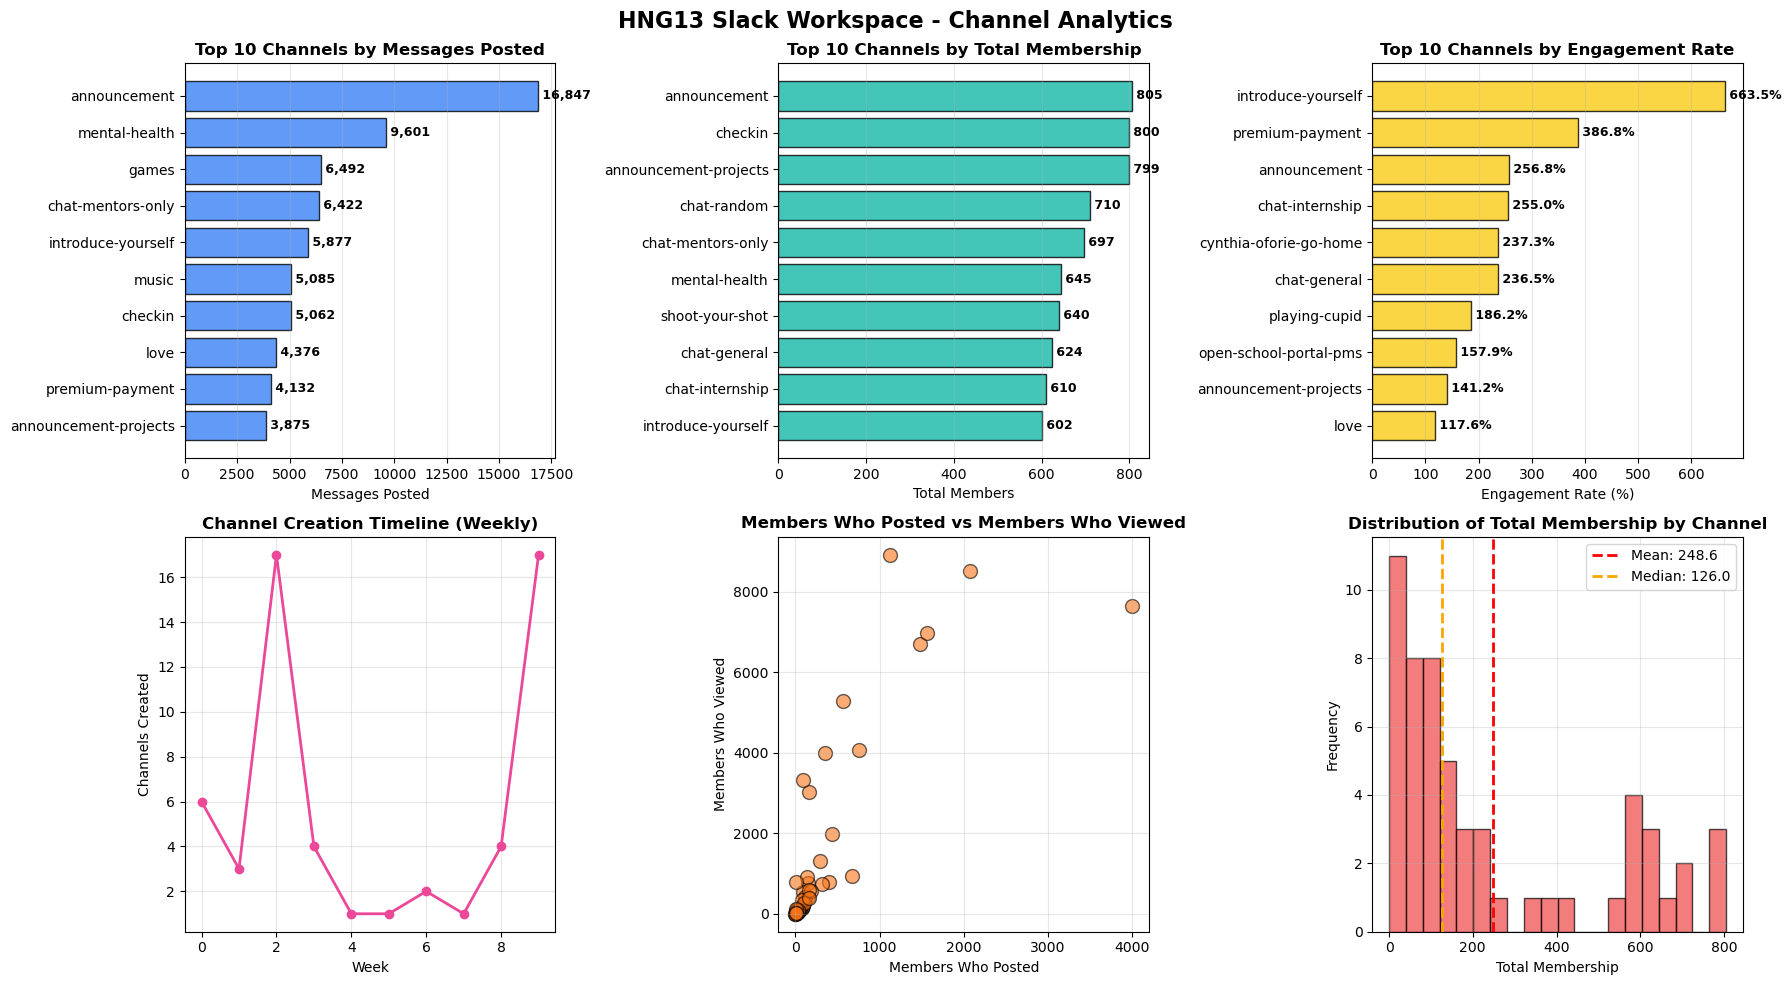

In [10]:
#EDA BLOCK 3: CHANNEL ANALYTICS

print("EDA BLOCK 3: CHANNEL ANALYTICS")


fig3, axes3 = plt.subplots(2, 3, figsize=(18, 10))
fig3.suptitle('HNG13 Slack Workspace - Channel Analytics', fontsize=16, fontweight='bold')

# Graph 1: Top 10 channels by messages
top_channels = channel_df.nlargest(10, 'Messages posted')
axes3[0, 0].barh(top_channels['Name'], top_channels['Messages posted'], 
                 color='#3B82F6', edgecolor='black', alpha=0.8)
axes3[0, 0].set_title('Top 10 Channels by Messages Posted', fontsize=12, fontweight='bold')
axes3[0, 0].set_xlabel('Messages Posted')
axes3[0, 0].invert_yaxis()
for i, v in enumerate(top_channels['Messages posted'].values):
    axes3[0, 0].text(v, i, f' {v:,}', va='center', fontweight='bold', fontsize=9)
axes3[0, 0].grid(axis='x', alpha=0.3)

# Graph 2: Top 10 channels by membership
top_membership = channel_df.nlargest(10, 'Total membership')
axes3[0, 1].barh(top_membership['Name'], top_membership['Total membership'], 
                 color='#14B8A6', edgecolor='black', alpha=0.8)
axes3[0, 1].set_title('Top 10 Channels by Total Membership', fontsize=12, fontweight='bold')
axes3[0, 1].set_xlabel('Total Members')
axes3[0, 1].invert_yaxis()
for i, v in enumerate(top_membership['Total membership'].values):
    axes3[0, 1].text(v, i, f' {v:,}', va='center', fontweight='bold', fontsize=9)
axes3[0, 1].grid(axis='x', alpha=0.3)

# Graph 3: Top 10 channels by engagement rate
channel_df['engagement_rate'] = (channel_df['Members who posted'] / 
                                 (channel_df['Total membership'] + 1) * 100)
top_engagement = channel_df.nlargest(10, 'engagement_rate')
axes3[0, 2].barh(top_engagement['Name'], top_engagement['engagement_rate'], 
                 color='#FACC15', edgecolor='black', alpha=0.8)
axes3[0, 2].set_title('Top 10 Channels by Engagement Rate', fontsize=12, fontweight='bold')
axes3[0, 2].set_xlabel('Engagement Rate (%)')
axes3[0, 2].invert_yaxis()
for i, v in enumerate(top_engagement['engagement_rate'].values):
    axes3[0, 2].text(v, i, f' {v:.1f}%', va='center', fontweight='bold', fontsize=9)
axes3[0, 2].grid(axis='x', alpha=0.3)

# Graph 4: Channel creation timeline (weekly)
channel_df_sorted = channel_df.sort_values('Created')
channel_timeline = channel_df_sorted.groupby(channel_df_sorted['Created'].dt.to_period('W')).size()
axes3[1, 0].plot(range(len(channel_timeline)), channel_timeline.values, 
                 color='#EC4899', linewidth=2, marker='o', markersize=6)
axes3[1, 0].set_title('Channel Creation Timeline (Weekly)', fontsize=12, fontweight='bold')
axes3[1, 0].set_xlabel('Week')
axes3[1, 0].set_ylabel('Channels Created')
axes3[1, 0].grid(True, alpha=0.3)

# Graph 5: Members who posted vs Members who viewed
axes3[1, 1].scatter(channel_df['Members who posted'], channel_df['Members who viewed'], 
                    s=100, alpha=0.6, color='#F97316', edgecolors='black', linewidth=1)
axes3[1, 1].set_title('Members Who Posted vs Members Who Viewed', fontsize=12, fontweight='bold')
axes3[1, 1].set_xlabel('Members Who Posted')
axes3[1, 1].set_ylabel('Members Who Viewed')
axes3[1, 1].grid(alpha=0.3)

# Graph 6: Distribution of total membership by channel
axes3[1, 2].hist(channel_df['Total membership'], bins=20, color='#EF4444', 
                 edgecolor='black', alpha=0.7)
axes3[1, 2].set_title('Distribution of Total Membership by Channel', fontsize=12, fontweight='bold')
axes3[1, 2].set_xlabel('Total Membership')
axes3[1, 2].set_ylabel('Frequency')
axes3[1, 2].axvline(avg_membership, color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {avg_membership:.1f}')
axes3[1, 2].axvline(median_membership, color='orange', linestyle='--', linewidth=2,
                    label=f'Median: {median_membership:.1f}')
axes3[1, 2].legend()
axes3[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('HNG13_EDA_Block3_Channel_Analytics.png', dpi=300, bbox_inches='tight')
plt.show()




In [11]:
# FEATURE ENGINEERING 

print("FEATURE ENGINEERING")


# Create a copy for feature engineering
df_model = member_df.copy()

# 1. Calculate Account Age Days
df_model['Account created (UTC)'] = pd.to_datetime(
    df_model['Account created (UTC)'],
    errors='coerce'
)

reference_date = pd.Timestamp('2025-12-06')
df_model['Account_Age_Days'] = (reference_date - df_model['Account created (UTC)']).dt.days

df_model['Account_Age_Days'] = df_model['Account_Age_Days'].fillna(0)


# 2. Create Target Variable: High Engagement (1 if messages > median, 0 otherwise)
median_messages_target = df_model['Messages posted'].median()
df_model['High_Engagement'] = (df_model['Messages posted'] > median_messages_target).astype(int)

# 3. Engagement Rate: Messages per Day Active
df_model['Engagement_Rate'] = df_model['Messages posted'] / (df_model['Days active'] + 1)

# Scale Engagement Rate to 0-100% relative to max in dataset
max_engagement = df_model['Engagement_Rate'].max()
df_model['Engagement_Rate_Percent'] = (df_model['Engagement_Rate'] / max_engagement * 100).round(2)


# 4. Activity Intensity: Days Active / Account Age
df_model['Activity_Intensity'] = df_model['Days active'] / (df_model['Account_Age_Days'] + 1)

# Cap at 1 (100%) and convert to %
df_model['Activity_Intensity_Percent'] = (df_model['Activity_Intensity'].clip(upper=1) * 100).round(2)

# 5. Encode Account Type
le_account = LabelEncoder()
df_model['Account_Type_Encoded'] = le_account.fit_transform(df_model['Account type'])

# 6. Extract Role Information from "What I do" field
df_model['Role_Category'] = df_model['What I do'].fillna('Unknown')
df_model['Backend'] = df_model['Role_Category'].str.contains('Backend', case=False, na=False).astype(int)
df_model['Frontend'] = df_model['Role_Category'].str.contains('Frontend|FE', case=False, na=False).astype(int)
df_model['Data Analyst'] = df_model['Role_Category'].str.contains('Data|Analytics', case=False, na=False).astype(int)
df_model['DevOps'] = df_model['Role_Category'].str.contains('DevOps|Infra', case=False, na=False).astype(int)
df_model['Mobile'] = df_model['Role_Category'].str.contains('Mobile|Android|iOS|Flutter|React Native', case=False, na=False).astype(int)
df_model['UI/UX'] = df_model['Role_Category'].str.contains('Design|UI|UX|Product Design', case=False, na=False).astype(int)
df_model['PM'] = df_model['Role_Category'].str.contains('Product Manager|PM|Project Manager', case=False, na=False).astype(int)
df_model['QA'] = df_model['Role_Category'].str.contains('QA|Test|Quality', case=False, na=False).astype(int)


# 7. Create Engagement Segments
df_model['Engagement_Segment'] = pd.cut(
    df_model['Messages posted'],
    bins=[-1, 10, 50, 200, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)


# 8. Activity Level
df_model['Activity_Level'] = pd.cut(
    df_model['Days active'],
    bins=[-1, 5, 15, 30, float('inf')],
    labels=['Inactive', 'Low', 'Medium', 'High'],
    include_lowest=True
)

# 9. Handle Missing Values
df_model['What I do'].fillna('Unknown', inplace=True)

# Select features for modeling
feature_cols = ['Days active', 'Account_Type_Encoded', 'Engagement_Rate', 
                'Activity_Intensity', 'Account_Age_Days', 'Backend', 
                'Frontend', 'Data Analyst', 'DevOps', 'Mobile', 'UI/UX', 'PM', 'QA']

X = df_model[feature_cols].copy()
y = df_model['High_Engagement'].copy()

# Handle any remaining NaN values
X = X.fillna(X.mean())

print("\n✓ Feature Engineering Completed")
print(f"\nFeatures created: {len(feature_cols)}")
print(f"Feature list: {feature_cols}")
print(f"\nTarget variable distribution:")
print(y.value_counts())
print(f"\nTarget variable percentages:")
print(y.value_counts(normalize=True) * 100)
print(f"\nFeature statistics:")
print(X.describe())
print(f"\nDataset shape for modeling: {X.shape}")
print(f"No missing values in features: {X.isnull().sum().sum() == 0}")


FEATURE ENGINEERING

✓ Feature Engineering Completed

Features created: 13
Feature list: ['Days active', 'Account_Type_Encoded', 'Engagement_Rate', 'Activity_Intensity', 'Account_Age_Days', 'Backend', 'Frontend', 'Data Analyst', 'DevOps', 'Mobile', 'UI/UX', 'PM', 'QA']

Target variable distribution:
High_Engagement
0    6778
1    5757
Name: count, dtype: int64

Target variable percentages:
High_Engagement
0    54.072597
1    45.927403
Name: proportion, dtype: float64

Feature statistics:
        Days active  Account_Type_Encoded  Engagement_Rate  \
count  12535.000000          12535.000000     12535.000000   
mean       9.585880              1.972397         5.166397   
std       13.791187              0.244037        20.045515   
min        0.000000              0.000000         0.000000   
25%        1.000000              2.000000         0.000000   
50%        3.000000              2.000000         0.500000   
75%       11.000000              2.000000         2.333333   
max       5

In [12]:
# MODEL TRAINING & EVALUATION 

print("MODEL TRAINING & EVALUATION")


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training set - High Engagement: {y_train.sum():,} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"Testing set - High Engagement: {y_test.sum():,} ({y_test.sum()/len(y_test)*100:.1f}%)")


print("MODEL 1: RANDOM FOREST CLASSIFIER")


# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"\nAccuracy: {rf_accuracy:.4f}")
print(f"AUC-ROC: {rf_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=['Low Engagement', 'High Engagement']))


print("MODEL 2: LOGISTIC REGRESSION")

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"\nAccuracy: {lr_accuracy:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred, target_names=['Low Engagement', 'High Engagement']))


print("MODEL COMPARISON")

print(f"Random Forest Accuracy: {rf_accuracy:.4f} | AUC: {rf_auc:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f} | AUC: {lr_auc:.4f}")
print(f"\nBest Model: {'Random Forest' if rf_auc > lr_auc else 'Logistic Regression'}")
print(f"Performance Difference (AUC): {abs(rf_auc - lr_auc):.4f}")


MODEL TRAINING & EVALUATION

Training set size: 10,028 (80.0%)
Testing set size: 2,507 (20.0%)
Training set - High Engagement: 4,606 (45.9%)
Testing set - High Engagement: 1,151 (45.9%)
MODEL 1: RANDOM FOREST CLASSIFIER

Accuracy: 1.0000
AUC-ROC: 1.0000

Classification Report:
                 precision    recall  f1-score   support

 Low Engagement       1.00      1.00      1.00      1356
High Engagement       1.00      1.00      1.00      1151

       accuracy                           1.00      2507
      macro avg       1.00      1.00      1.00      2507
   weighted avg       1.00      1.00      1.00      2507

MODEL 2: LOGISTIC REGRESSION

Accuracy: 0.9126
AUC-ROC: 0.9882

Classification Report:
                 precision    recall  f1-score   support

 Low Engagement       0.88      0.97      0.92      1356
High Engagement       0.96      0.85      0.90      1151

       accuracy                           0.91      2507
      macro avg       0.92      0.91      0.91      2507
   

MODEL EVALUATION VISUALIZATIONS


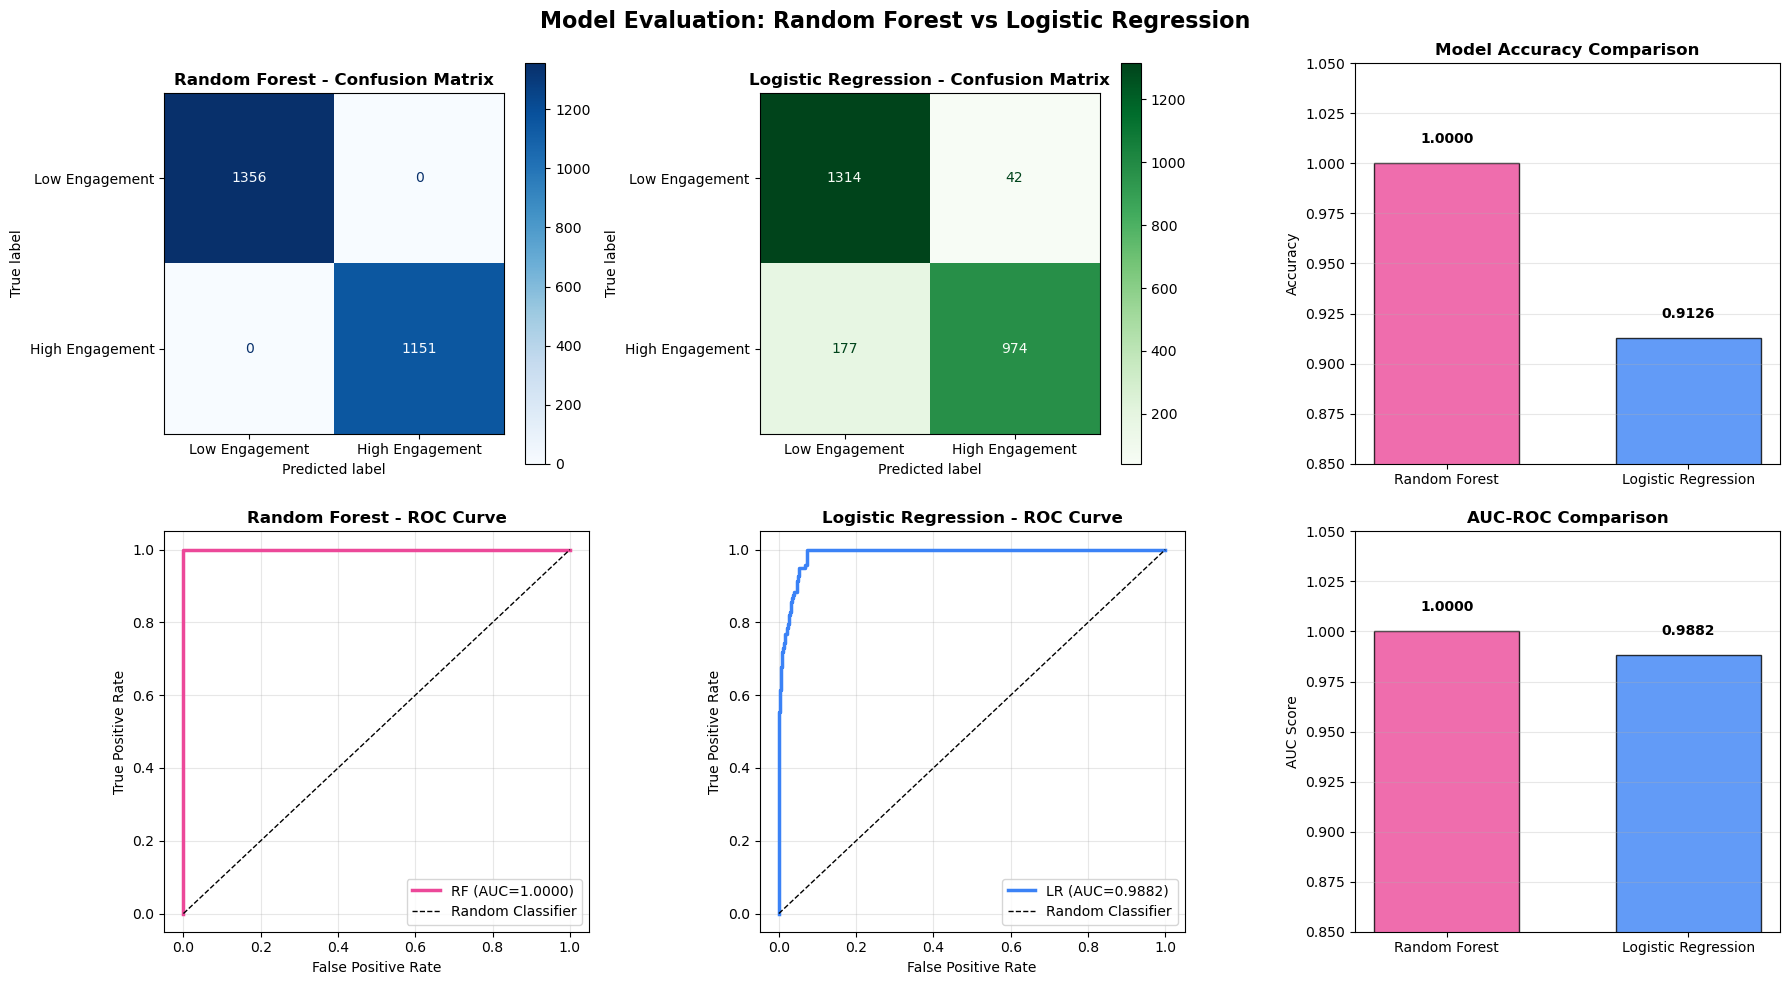

In [13]:
# MODEL EVALUATION VISUALIZATIONS 

print("MODEL EVALUATION VISUALIZATIONS")


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Evaluation: Random Forest vs Logistic Regression', 
             fontsize=16, fontweight='bold')

# 1. Confusion Matrix - Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, 
                                 display_labels=['Low Engagement', 'High Engagement'])
disp_rf.plot(ax=axes[0, 0], cmap='Blues', values_format='d')
axes[0, 0].set_title('Random Forest - Confusion Matrix', fontweight='bold', fontsize=12)

# 2. Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                                 display_labels=['Low Engagement', 'High Engagement'])
disp_lr.plot(ax=axes[0, 1], cmap='Greens', values_format='d')
axes[0, 1].set_title('Logistic Regression - Confusion Matrix', fontweight='bold', fontsize=12)

# 3. Model Accuracy Comparison
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]
colors_acc = ['#EC4899', '#3B82F6']
bars = axes[0, 2].bar(models, accuracies, color=colors_acc, edgecolor='black', alpha=0.8, width=0.6)
axes[0, 2].set_title('Model Accuracy Comparison', fontweight='bold', fontsize=12)
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].set_ylim([0.85, 1.05])
for i, v in enumerate(accuracies):
    axes[0, 2].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. ROC Curve - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
axes[1, 0].plot(fpr_rf, tpr_rf, linewidth=2.5, color='#EC4899', label=f'RF (AUC={rf_auc:.4f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1, 0].set_title('Random Forest - ROC Curve', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(alpha=0.3)

# 5. ROC Curve - Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
axes[1, 1].plot(fpr_lr, tpr_lr, linewidth=2.5, color='#3B82F6', label=f'LR (AUC={lr_auc:.4f})')
axes[1, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1, 1].set_title('Logistic Regression - ROC Curve', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].legend(loc='lower right')
axes[1, 1].grid(alpha=0.3)

# 6. AUC Comparison
aucs = [rf_auc, lr_auc]
axes[1, 2].bar(models, aucs, color=colors_acc, edgecolor='black', alpha=0.8, width=0.6)
axes[1, 2].set_title('AUC-ROC Comparison', fontweight='bold', fontsize=12)
axes[1, 2].set_ylabel('AUC Score')
axes[1, 2].set_ylim([0.85, 1.05])
for i, v in enumerate(aucs):
    axes[1, 2].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('HNG13_Model_Evaluation_Comparison.png', dpi=600, bbox_inches='tight')
plt.show()




FEATURE IMPORTANCE ANALYSIS


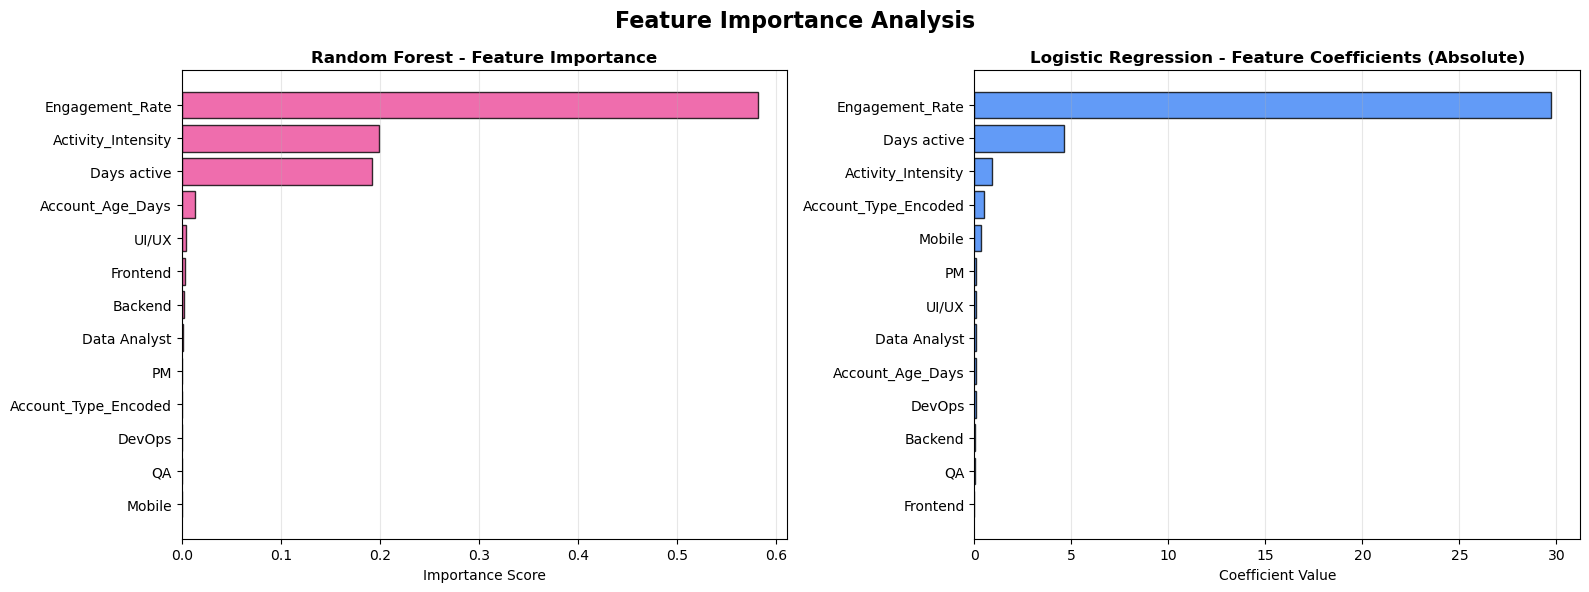


✓ Feature Importance Analysis completed

Top 5 Important Features (Random Forest):
           Feature  Importance
             UI/UX    0.003971
  Account_Age_Days    0.012980
       Days active    0.191827
Activity_Intensity    0.199501
   Engagement_Rate    0.582499

Top 5 Important Features (Logistic Regression):
             Feature  Coefficient
              Mobile     0.347795
Account_Type_Encoded     0.479290
  Activity_Intensity     0.907535
         Days active     4.596552
     Engagement_Rate    29.725610


In [14]:
#  FEATURE IMPORTANCE ANALYSIS 

print("FEATURE IMPORTANCE ANALYSIS")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[0].barh(rf_importance['Feature'], rf_importance['Importance'], 
             color='#EC4899', edgecolor='black', alpha=0.8)
axes[0].set_title('Random Forest - Feature Importance', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Importance Score')
axes[0].grid(axis='x', alpha=0.3)

# Logistic Regression Coefficients
lr_coef = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Coefficient', ascending=True)

axes[1].barh(lr_coef['Feature'], lr_coef['Coefficient'], 
             color='#3B82F6', edgecolor='black', alpha=0.8)
axes[1].set_title('Logistic Regression - Feature Coefficients (Absolute)', 
                  fontweight='bold', fontsize=12)
axes[1].set_xlabel('Coefficient Value')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('HNG13_Feature_Importance_Analysis.png', dpi=600, bbox_inches='tight')
plt.show()

print("\n✓ Feature Importance Analysis completed")
print("\nTop 5 Important Features (Random Forest):")
print(rf_importance.tail(5).to_string(index=False))
print("\nTop 5 Important Features (Logistic Regression):")
print(lr_coef.tail(5).to_string(index=False))


In [15]:

# DATA PREDICTION FOR EXPORT


print("\nSTAGE 4: GENERATING FULL-DATA PREDICTIONS FOR POWER BI")

start = pd.Timestamp("2025-10-15")
end = pd.Timestamp("2025-12-06")

total_days = (end - start).days
print("Total Cohort Days:", total_days)

# SELECT BEST MODEL BASED ON AUC

best_model = rf_model if rf_auc > lr_auc else lr_model
best_name = "Random Forest" if rf_auc > lr_auc else "Logistic Regression"

print(f"\nBest model selected for full prediction: {best_name}")


# SCALE FULL FEATURE DATA USING EXISTING SCALER

X_full_scaled = scaler.transform(X)

# GENERATE PREDICTIONS

pred_class = best_model.predict(X_full_scaled)
pred_prob = best_model.predict_proba(X_full_scaled)[:, 1]

print("✓ Predictions generated successfully")


# ATTACH PREDICTIONS TO ORIGINAL FEATURE DATAFRAME

df_pred = df_model.copy()
df_pred["Predicted_Engagement"] = pred_class
df_pred["Engagement_Probability"] = pred_prob

# Optional readable label
df_pred["Prediction_Label"] = df_pred["Predicted_Engagement"].map({
    1: "High Engagement",
    0: "Low Engagement"
})


print("✓ Predictions added to dataframe")



# ---- Create Consistency Score ----
df_pred["consistency_score"] = df_pred["Messages posted"] / (df_pred["Days active"] + 1)

print("✓ Predictions added to dataframe")


# ADD CONSISTENCY SCORE 

df_pred["consistency_score"] = df_pred["Messages posted"
] / (df_pred["Days active"] + 1)
print("✓ Consistency Score Added")



# EXPORT FILE FOR POWER BI

output_file = "HNG13_Stage4_Engagement_Predictions.csv"
df_pred.to_csv(output_file, index=False)

print(f"\n✓ Prediction file exported successfully → {output_file}")


# SUMMARY

print("\nPREDICTION SUMMARY:")
print(df_pred[["Predicted_Engagement", "Engagement_Probability"]].describe())

print("\nTop 10 Highest Engagement Probability:")
print(df_pred.sort_values("Engagement_Probability", ascending=False).head(10))



STAGE 4: GENERATING FULL-DATA PREDICTIONS FOR POWER BI
Total Cohort Days: 52

Best model selected for full prediction: Random Forest
✓ Predictions generated successfully
✓ Predictions added to dataframe
✓ Predictions added to dataframe
✓ Consistency Score Added

✓ Prediction file exported successfully → HNG13_Stage4_Engagement_Predictions.csv

PREDICTION SUMMARY:
       Predicted_Engagement  Engagement_Probability
count          12535.000000            12535.000000
mean               0.459274                0.459296
std                0.498359                0.494908
min                0.000000                0.000000
25%                0.000000                0.000000
50%                0.000000                0.007266
75%                1.000000                1.000000
max                1.000000                1.000000

Top 10 Highest Engagement Probability:
                        Name                    What I do Account type  \
6267  Jeremiah Charles Bwala          Front-End Dev

In [16]:
#  EXPORT FILES 

print("EXPORT FILES FOR POWER BI")


# FILE 1: Member Engagement Dashboard Data
dashboard1 = df_model[[
    'Name', 'What I do', 'Account type', 'Days active', 'Messages posted',
    'Account_Age_Days', 'Engagement_Rate', 'Activity_Intensity', 
    'High_Engagement', 'Engagement_Segment', 'Activity_Level',
    'Backend', 'Frontend', 'Data Analyst', 'DevOps','Mobile', 'UI/UX', 'PM', 'QA'
]].copy()

dashboard1.columns = [
    'Member_Name', 'Role', 'Account_Type', 'Days_Active', 'Messages_Posted',
    'Account_Age_Days', 'Engagement_Rate', 'Activity_Intensity',
    'High_Engagement', 'Engagement_Segment', 'Activity_Level',
    'Backend', 'Frontend', 'Data_Analyst', 'DevOps', 'Mobile', 'UI/UX', 'PM', 'QA'
]

dashboard1.to_csv('HNG13_Member_Engagement_Dashboard.csv', index=False)
print(f"\n✓ File 1 exported: HNG13_Member_Engagement_Dashboard.csv")
print(f"  - Records: {len(dashboard1):,}")
print(f"  - Columns: {len(dashboard1.columns)}")
print(f"  - Size: {dashboard1.memory_usage(deep=True).sum() / 1024:.2f} KB")

# FILE 2: Workspace & Channel Analytics Dashboard Data
# Aggregate channel data with engagement metrics
channel_summary = channel_df[[
    'Name', 'Visibility', 'Total membership', 'Messages posted',
    'Members who posted', 'Members who viewed'
]].copy()

channel_summary.columns = [
    'Channel_Name', 'Visibility', 'Total_Members', 'Messages_Posted',
    'Members_Posted', 'Members_Viewed'
]

# Add engagement metrics
channel_summary['Engagement_Rate'] = (channel_summary['Members_Posted'] / 
                                      (channel_summary['Total_Members'] + 1)).round(4)
channel_summary['View_Rate'] = (channel_summary['Members_Viewed'] / 
                                (channel_summary['Total_Members'] + 1)).round(4)

dashboard2 = channel_summary.copy()
dashboard2.to_csv('HNG13_Channel_Analytics_Dashboard.csv', index=False)
print(f"\n✓ File 2 exported: HNG13_Channel_Analytics_Dashboard.csv")
print(f"  - Records: {len(dashboard2):,}")
print(f"  - Columns: {len(dashboard2.columns)}")
print(f"  - Size: {dashboard2.memory_usage(deep=True).sum() / 1024:.2f} KB")


print("EXPORT SUMMARY FOR POWER BI")


print("\n FILE 1: HNG13_Member_Engagement_Dashboard.csv")
print(f"   Records: {len(dashboard1):,}")
print(f"   Key Columns:")
print(f"     - Member_Name, Role, Account_Type")
print(f"     - Days_Active, Messages_Posted, Account_Age_Days")
print(f"     - Engagement_Rate, Activity_Intensity")
print(f"     - High_Engagement, Engagement_Segment, Activity_Level")
print(f"     - Role Indicators (Backend, Frontend, Data_Analyst, DevOps, Mobile, UI/UX, PM, QA)")

print("\n FILE 2: HNG13_Channel_Analytics_Dashboard.csv")
print(f"   Records: {len(dashboard2):,}")
print(f"   Key Columns:")
print(f"     - Channel_Name, Visibility")
print(f"     - Total_Members, Messages_Posted")
print(f"     - Members_Posted, Members_Viewed")
print(f"     - Engagement_Rate, View_Rate")


# FILE 3: Model Training & Evaluation Dataset for Power BI

# Reconstruct scaled training + testing datasets for export
X_train_export = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_export = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Add identifiers and targets
X_train_export['Set'] = 'Train'
X_test_export['Set'] = 'Test'

X_train_export['Actual_High_Engagement'] = y_train.values
X_test_export['Actual_High_Engagement'] = y_test.values

# Add model predictions (probabilities + classes)
X_test_export['RF_Prediction'] = rf_pred
X_test_export['RF_Probability'] = rf_pred_proba

X_test_export['LR_Prediction'] = lr_pred
X_test_export['LR_Probability'] = lr_pred_proba

# Merge train + test into one dataset
model_export = pd.concat([X_train_export, X_test_export], ignore_index=True)


# File 4: DAILY SUMMARY DATA FOR POWER BI
print("\n[NEW] Generating Daily Summary dataset for Power BI...")

# Extract daily metrics from overall analytics
daily_summary_export = analytics_df[[
    'Date',
    'Daily active people',
    'Daily people posting messages',
    'Messages in public channels',
    'Messages in private channels',
    'Messages in DMs',
    'Messages posted',
    'Monthly active people'
]].copy()

# Add additional derived metrics useful for Power BI
daily_summary_export['Public %'] = (
    daily_summary_export['Messages in public channels'] / 
    daily_summary_export['Messages posted']
).replace([np.inf, -np.inf], 0).fillna(0)

daily_summary_export['Private %'] = (
    daily_summary_export['Messages in private channels'] / 
    daily_summary_export['Messages posted']
).replace([np.inf, -np.inf], 0).fillna(0)

daily_summary_export['DM %'] = (
    daily_summary_export['Messages in DMs'] / 
    daily_summary_export['Messages posted']
).replace([np.inf, -np.inf], 0).fillna(0)

daily_summary_export['Engagement Ratio'] = (
    daily_summary_export['Daily people posting messages'] /
    daily_summary_export['Daily active people']
).replace([np.inf, -np.inf], 0).fillna(0)

print("✓ Daily Summary dataset created!")

daily_summary_export.to_csv("HNG13_Daily_Summary.csv", index=False)
print("   5. HNG13_Daily_Summary.csv - Daily activity & message metrics")


# Export
model_export.to_csv("HNG13_Model_Training_Evaluation.csv", index=False)

print("\n File 3 exported: HNG13_Model_Training_Evaluation.csv")
print(f"  - Records: {len(model_export):,}")
print(f"  - Columns: {len(model_export.columns)}")
print(f"  - Size: {model_export.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n FILE 3: HNG13_Model_Training_Evaluation.csv")
print("   Purpose: Used for Power BI model analysis visualizations")
print("   Includes:")
print("     - All feature values (scaled)")
print("     - Train/Test split indicator")
print("     - Actual engagement label")
print("     - Random Forest predictions + probabilities")
print("     - Logistic Regression predictions + probabilities")





EXPORT FILES FOR POWER BI

✓ File 1 exported: HNG13_Member_Engagement_Dashboard.csv
  - Records: 12,535
  - Columns: 19
  - Size: 3419.17 KB

✓ File 2 exported: HNG13_Channel_Analytics_Dashboard.csv
  - Records: 56
  - Columns: 8
  - Size: 10.13 KB
EXPORT SUMMARY FOR POWER BI

 FILE 1: HNG13_Member_Engagement_Dashboard.csv
   Records: 12,535
   Key Columns:
     - Member_Name, Role, Account_Type
     - Days_Active, Messages_Posted, Account_Age_Days
     - Engagement_Rate, Activity_Intensity
     - High_Engagement, Engagement_Segment, Activity_Level
     - Role Indicators (Backend, Frontend, Data_Analyst, DevOps, Mobile, UI/UX, PM, QA)

 FILE 2: HNG13_Channel_Analytics_Dashboard.csv
   Records: 56
   Key Columns:
     - Channel_Name, Visibility
     - Total_Members, Messages_Posted
     - Members_Posted, Members_Viewed
     - Engagement_Rate, View_Rate

[NEW] Generating Daily Summary dataset for Power BI...
✓ Daily Summary dataset created!
   5. HNG13_Daily_Summary.csv - Daily activity 